In [1]:
#import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pd.set_option('display.max_columns', None) # show all columns
# pd.set_option('display.max_rows', None) # show all rows

In [3]:
#read csv file

df = pd.read_csv('data/owid-covid-data.csv')

# Step 1: Remove duplicate or irrelevant observations

In [4]:
df.isna().sum()

iso_code                                        0
continent                                    9995
location                                        0
date                                            0
total_cases                                  3040
                                            ...  
human_development_index                     30197
excess_mortality_cumulative_absolute       161270
excess_mortality_cumulative                161270
excess_mortality                           161270
excess_mortality_cumulative_per_million    161270
Length: 67, dtype: int64

In [5]:
## drop columns that has null more than 150000
df.drop(df.columns[df.isna().sum()> 150000], axis = 1, inplace = True)

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',

In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.639770e+05,1.638430e+05,1.618580e+05,1.461080e+05,146151.000000,144050.000000,163216.000000,163082.000000,161103.000000,145360.000000,145403.000000,143308.000000,126199.000000,23538.000000,23538.000000,24684.000000,24684.000000,6.758700e+04,6.953600e+04,69536.000000,67587.000000,8.436500e+04,84365.000000,78973.000000,78394.000000,4.556000e+04,4.332100e+04,4.059300e+04,1.782000e+04,3.771900e+04,8.540100e+04,45560.000000,43321.000000,40593.000000,17820.000000,85401.000000,8.407900e+04,84079.000000,130959.000000,1.659390e+05,148540.000000,138401.000000,136901.000000,137659.000000,139077.000000,91590.000000,137345.000000,144546.000000,106488.000000,105027.000000,68854.000000,124174.000000,155913.000000,136820.000000
mean,2.560297e+06,1.164153e+04,1.164055e+04,5.791914e+04,170.941143,172.546963,29825.981701,168.196259,167.033507,512.154301,1.686368,1.686839,0.999941,902.782352,23.947322,4193.309350,167.218384,6.833727e+04,1.745877e+07,745.584433,3.227168,6.108206e+04,2.913341,0.097872,198.390443,1.734137e+08,8.874181e+07,7.004719e+07,1.964212e+07,1.167313e+06,5.198079e+05,73.387224,38.049239,32.700467,12.565946,3297.318778,2.142687e+05,0.148757,54.499280,1.473961e+08,464.256373,30.566758,8.762152,5.534009,19642.207419,13.581206,260.227222,8.211348,10.626991,32.778648,50.786567,3.027706,73.575944,0.725574
std,1.560856e+07,8.477591e+04,8.294513e+04,3.034096e+05,831.419443,816.374300,52749.291587,713.462096,537.503867,787.876999,5.150768,3.619836,0.368448,2677.742352,28.046580,11650.073067,209.335025,2.160574e+05,6.454048e+07,1802.797405,8.928600,1.936986e+05,7.499338,0.111083,4203.557645,7.829246e+08,4.017363e+08,3.319650e+08,9.318071e+07,4.359996e+06,2.801617e+06,64.767648,28.946609,27.772723,17.407772,3900.621494,1.181535e+06,0.245593,20.455528,7.053961e+08,2143.950229,9.102095,6.146170,4.186023,20645.814721,20.022162,119.864451,4.495628,10.557987,13.524077,31.811432,2.449998,7.491446,0.149962
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,2.023000e+03,1.000000e+00,7.000000e+00,7.975000e+01,0.000000,0.143000,627.713000,0.041000,1.630000,18.658000,0.000000,0.018000,0.810000,28.000000,3.929000,129.000000,26.448250,2.481000e+03,3.756105e+05,34.990250,0.256000,2.155000e+03,0.231000,0.018600,7.200000,6.074185e+05,3.941760e+05,2.781310e+05,2.440750e+03,6.285000e+03,1.053000e+03,12.335000,8.750000,5.200000,0.010000,680.000000,4.

In [8]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [9]:
continent_infect = df[['continent','location','date','total_cases_per_million','total_deaths_per_million','gdp_per_capita','population','population_density','extreme_poverty','aged_65_older','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','hosp_patients_per_million','icu_patients_per_million','hospital_beds_per_thousand' , 'people_fully_vaccinated']]

In [10]:
continent_infect

,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [11]:
continent_infect['continent'].value_counts()

Africa           39582
Europe           37242
Asia             36344
North America    25033
South America     9556
Oceania           9265
Name: continent, dtype: int64

In [12]:
continent_infect.isna().sum()

continent                                9995
location                                    0
date                                        0
total_cases_per_million                  3801
total_deaths_per_million                21657
gdp_per_capita                          27940
population                               1078
population_density                      18477
extreme_poverty                         75427
aged_65_older                           30116
total_vaccinations_per_hundred         121457
people_vaccinated_per_hundred          123696
people_fully_vaccinated_per_hundred    126424
total_boosters_per_hundred             149197
hosp_patients_per_million              142333
icu_patients_per_million               143479
hospital_beds_per_thousand              42843
people_fully_vaccinated                126424
dtype: int64

In [13]:
continent_infect = continent_infect[continent_infect['continent'].notnull()]
continent_infect

,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [14]:
continent_infect = continent_infect[continent_infect['population'].notna()]
continent_infect

,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [15]:
continent_infect[continent_infect['hosp_patients_per_million'].isna()]

,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
0,Asia,Afghanistan,2020-02-24,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,Asia,Afghanistan,2020-02-25,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,Asia,Afghanistan,2020-02-26,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,Asia,Afghanistan,2020-02-27,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,Asia,Afghanistan,2020-02-28,0.126,NaN,1803.987,39835428.0,54.422,NaN,2.581,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15818.731,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.55,28.99,22.59,0.97,NaN,NaN,1.7,3408609.0
167013,Africa,Zimbabwe,2022-03-05,15837.284,357.603,1899.775,15092171.0,42.729,21.4,2.822,52.58,29.00,22.60,0.98,NaN,NaN,1.7,3410340.0
167014,Africa,Zimbabwe,2022-03-06,15849.873,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.60,29.01,22.60,0.99,NaN,NaN,1.7,3410960.0
167015,Africa,Zimbabwe,2022-03-07,15883.069,357.735,1899.775,15092171.0,42.729,21.4,2.822,52.63,29.02,22.61,1.00,NaN,NaN,1.7,3412556.0


In [16]:
continent_infect = continent_infect.fillna({'total_cases_per_million': 0, 'total_deaths_per_million': 0, 'total_vaccinations_per_hundred': 0 })


In [17]:
continent_infect.isna().sum()

continent                                   0
location                                    0
date                                        0
total_cases_per_million                     0
total_deaths_per_million                    0
gdp_per_capita                          18405
population                                  0
population_density                       8942
extreme_poverty                         65892
aged_65_older                           20581
total_vaccinations_per_hundred              0
people_vaccinated_per_hundred          118672
people_fully_vaccinated_per_hundred    121188
total_boosters_per_hundred             142874
hosp_patients_per_million              132021
icu_patients_per_million               133167
hospital_beds_per_thousand              33308
people_fully_vaccinated                121188
dtype: int64

In [18]:
continent_infect.dtypes 

continent                               object
location                                object
date                                    object
total_cases_per_million                float64
total_deaths_per_million               float64
gdp_per_capita                         float64
population                             float64
population_density                     float64
extreme_poverty                        float64
aged_65_older                          float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
total_boosters_per_hundred             float64
hosp_patients_per_million              float64
icu_patients_per_million               float64
hospital_beds_per_thousand             float64
people_fully_vaccinated                float64
dtype: object

In [19]:
africa_infect = continent_infect[continent_infect['continent'] == 'Africa']
europe_infect = continent_infect[continent_infect['continent'] == 'Europe']
asia_infect = continent_infect[continent_infect['continent'] == 'Asia']
north_america_infect = continent_infect[continent_infect['continent'] == 'North America']
south_america_infect = continent_infect[continent_infect['continent'] == 'South America']
america_infect = continent_infect[continent_infect['continent'].isin(['North America', 'South America'])]
oceania_infect = continent_infect[continent_infect['continent'] == 'Oceania']

### Which countries have highest no of cases and deaths per million ?


In [20]:
am_top10_totalcases = america_infect.groupby('location', as_index=False).max('date').sort_values('total_cases_per_million', ascending = False).head(10)
am_top10_totalcases

,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,population,population_density,extreme_poverty,aged_65_older,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,hosp_patients_per_million,icu_patients_per_million,hospital_beds_per_thousand,people_fully_vaccinated
3,Aruba,314678.856,1977.704,35973.781,107195.0,584.800,NaN,13.085,156.86,81.67,75.20,NaN,NaN,NaN,NaN,80608.0
13,Cayman Islands,297918.734,270.685,49903.029,66498.0,256.496,NaN,NaN,215.43,92.49,89.82,NaN,NaN,NaN,NaN,59726.0
9,Bonaire Sint Eustatius and Saba,288636.793,1172.244,NaN,26445.0,NaN,NaN,NaN,135.55,72.26,63.29,NaN,NaN,NaN,NaN,16736.0
46,Uruguay,246082.524,2025.450,20551.409,3485152.0,19.751,0.1,14.655,218.71,85.07,78.38,55.26,NaN,NaN,2.80,2731639.0
45,United States,238406.168,2889.154,54225.446,332915074.0,35.608,1.2,15.413,167.34,76.57,64.90,28.68,464.19,86.782,2.77,215466571.0
18,Curacao,237778.830,1601.981,NaN,164796.0,362.644,NaN,16.367,148.75,64.98,59.64,24.14,NaN,NaN,NaN,98278.0
24,Greenland,207937.680,351.692,NaN,56868.0,0.137,NaN,NaN,140.23,72.52,67.70,NaN,NaN,NaN,NaN,38502.0
11,British Virgin Islands,200210.367,2037.932,NaN,30423.0,207.973,NaN,NaN,120.34,62.20,56.95,NaN,NaN,NaN,NaN,17325.0
2,Argentina,196232.880,2782.561,18933.907,45605823.0,16.177,0.6,11.198,206.93,88.64,79.50,38.14,NaN,174.736,5.00,36256855.0
5,Barbados,195948.670,1122.666,16978.068,287708.0,664.463,NaN,14.952,107.95,55.79,52.16,NaN,NaN,NaN,5.80,150066.0


[Text(0.5, 1.0, 'Number of total cases per million')]

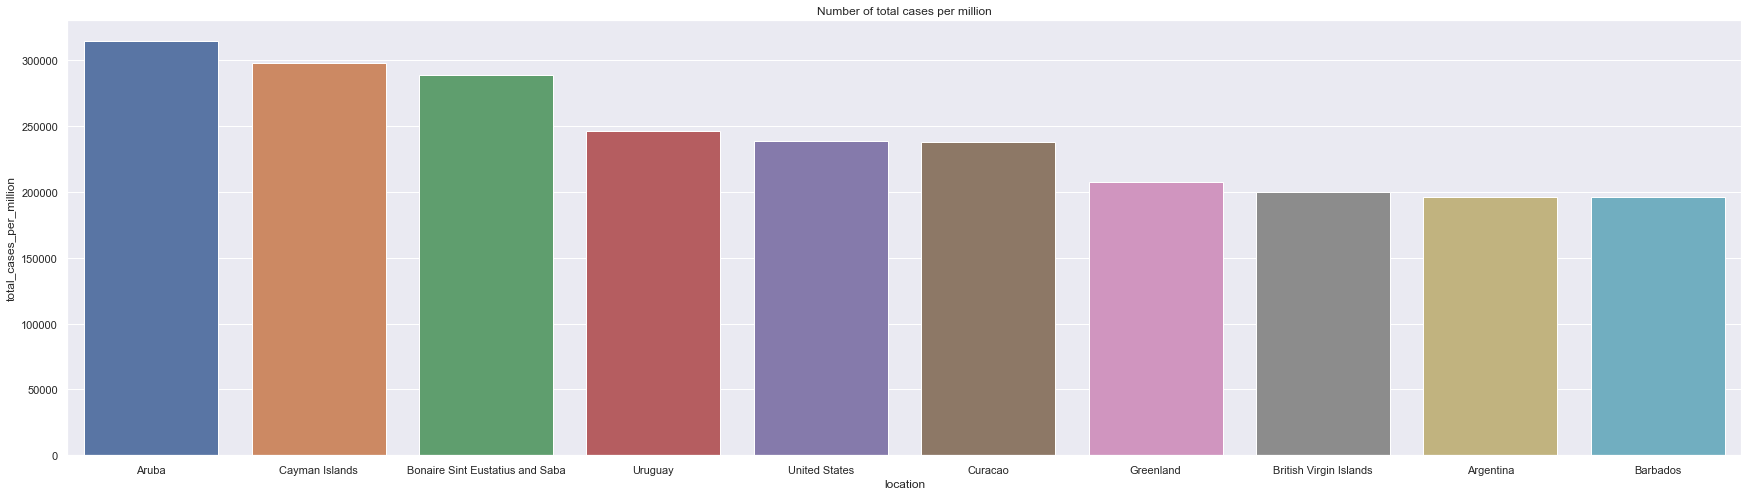

In [21]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.barplot(x="location", y="total_cases_per_million", data=am_top10_totalcases).set(title='Number of total cases per million')


[Text(0.5, 1.0, 'Number of total deaths per million')]

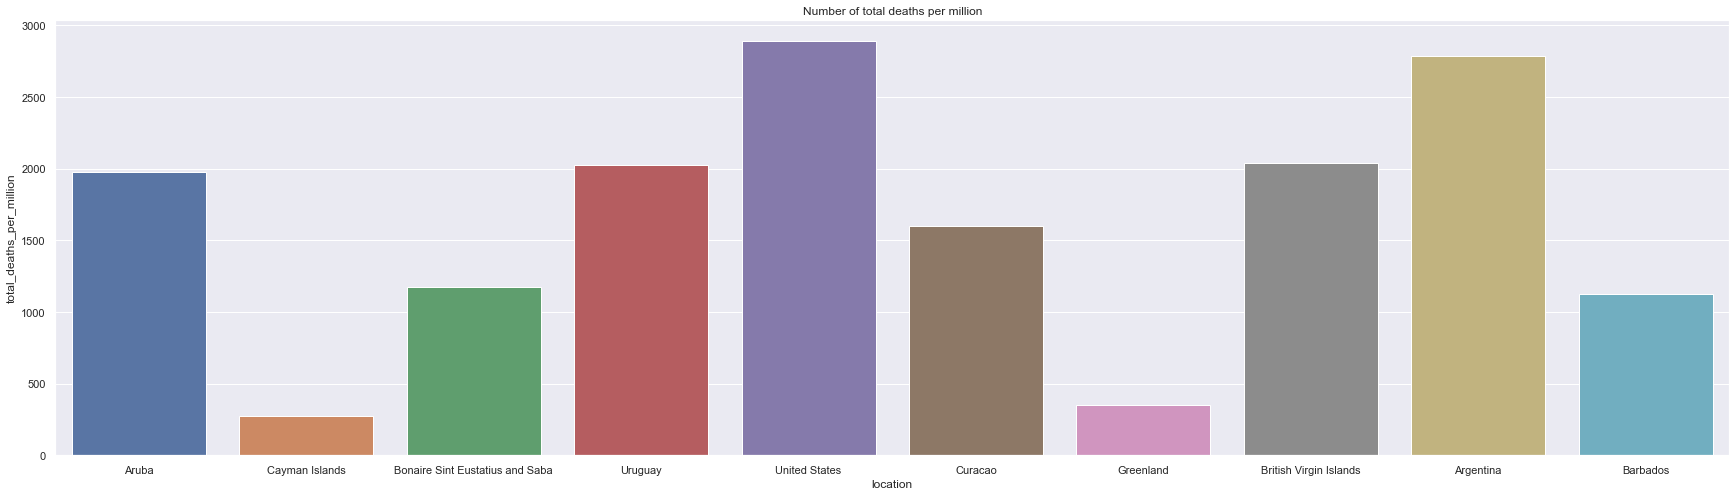

In [22]:
sns.barplot(x="location", y="total_deaths_per_million", data=am_top10_totalcases).set(title='Number of total deaths per million')

###  From the above two graphs we can conclude the total cases are high in countries like Aruba, Cayman island, etc. but the death rate is low. Highest death rate is observed in United States and Argentina

In [23]:
am_top10 = ['Aruba', 'Cayman Islands', 'Bonaire Sint Eustatius and Saba', 'Uruguay', 'United States', 'Curacao', 'Greenland', 'British Virgin Islands', 'Argentina', 'Barbados']
am_top10_fully_vaccinated = america_infect[america_infect['location'].isin(am_top10)].groupby('location', as_index=False).max('date').sort_values('people_fully_vaccinated', ascending = False).head(10)



Text(0.5, 1.0, 'Number of people fully vaccinated')

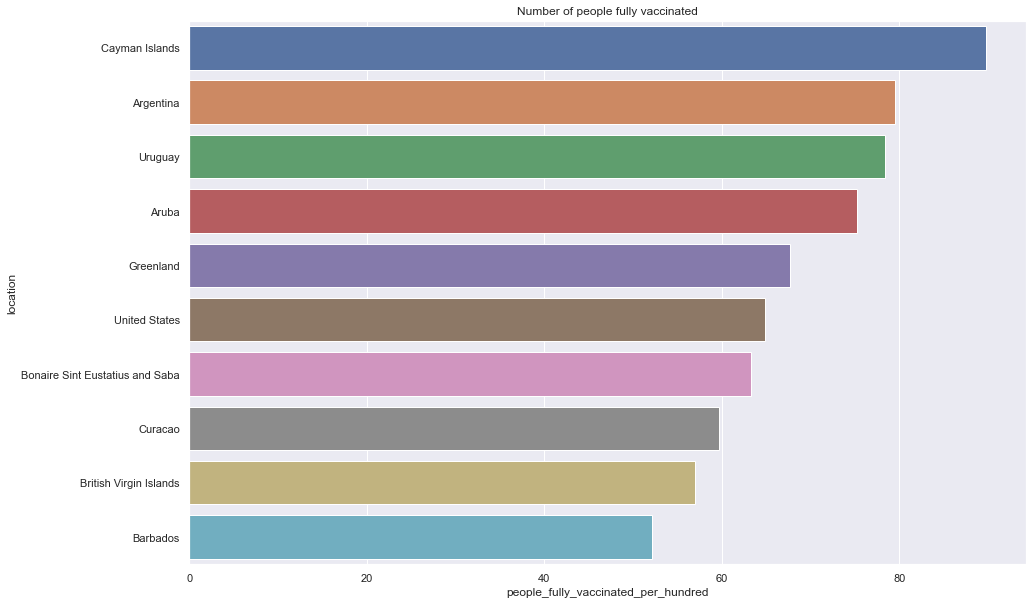

In [24]:
f, ax = plt.subplots(figsize=(15, 10))
df = am_top10_fully_vaccinated.groupby('location' , as_index=False).mean().sort_values('people_fully_vaccinated_per_hundred', ascending = False)
sns.set_color_codes("muted")
sns.barplot(x="people_fully_vaccinated_per_hundred", y="location", data=df )
ax.set_title('Number of people fully vaccinated')


###  We conclude that Countries, where people get fully vaccinated tend to have a lower number of deaths per million. For example, the Cayman Islands and Aruba have the highest number of total cases, but fewer deaths are with the highest number of fully vaccinated. But all this depends on the population as well.

Text(0.5, 1.0, 'Means - Number of populaiton density')

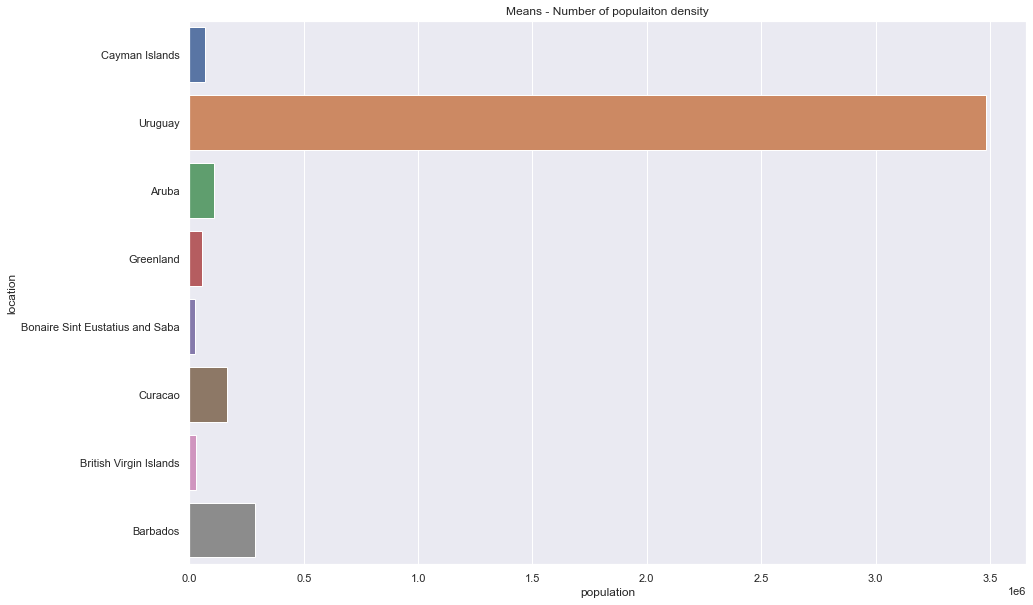

In [25]:
f, ax = plt.subplots(figsize=(15, 10))
df = df[~df['location'].isin(['United States', 'Argentina'])]
sns.set_color_codes("muted")
sns.barplot(x="population", y="location", data=df )
ax.set_title('Means - Number of populaiton density')

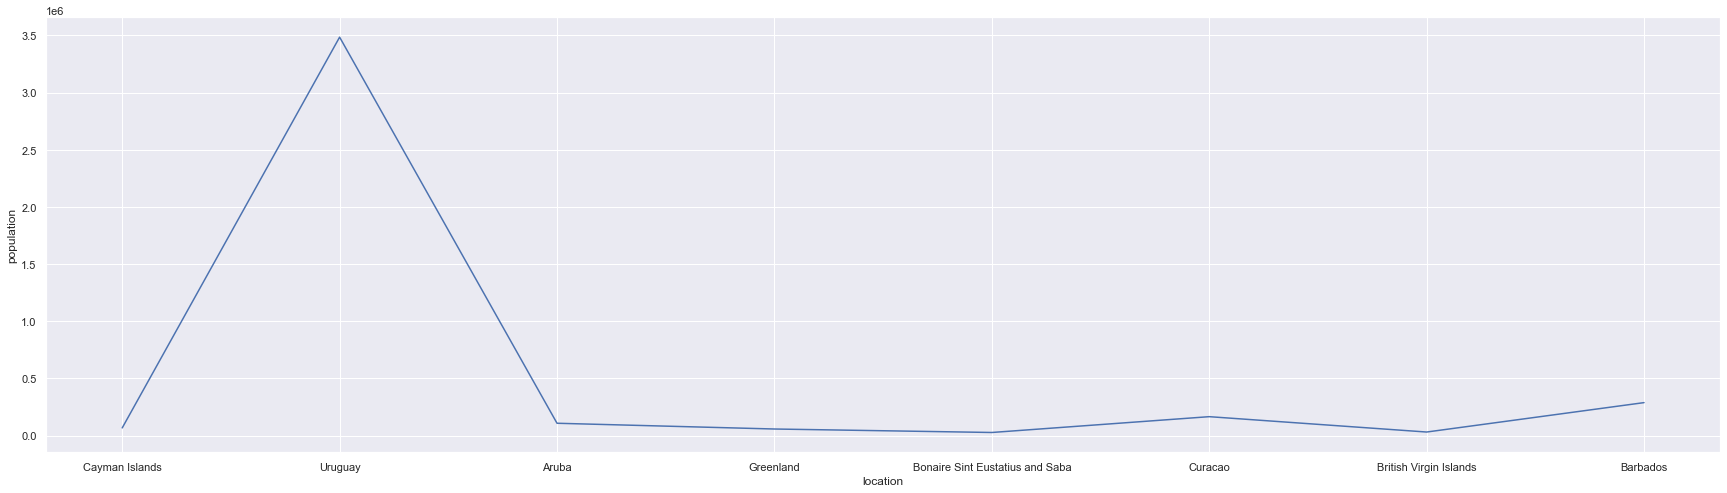

In [26]:
sns.lineplot(x="location", y="population", data=df)
plt.show()

### The number of population is affect the total number of deaths. If the population is high, the number of total will be high than any lower countries